<a href="https://colab.research.google.com/github/aravindrepository/Credit-risk/blob/main/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.tools as tls
import plotly.offline as py


import warnings

warnings.filterwarnings("ignore")

# Read Data

In [ ]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/loan/loan.csv')

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
null_percentages = df.isnull().mean() * 100



for column, percentage in null_percentages.items():

  if percentage:

    print({column: [round(percentage, 5), df[column].dtype]})

{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

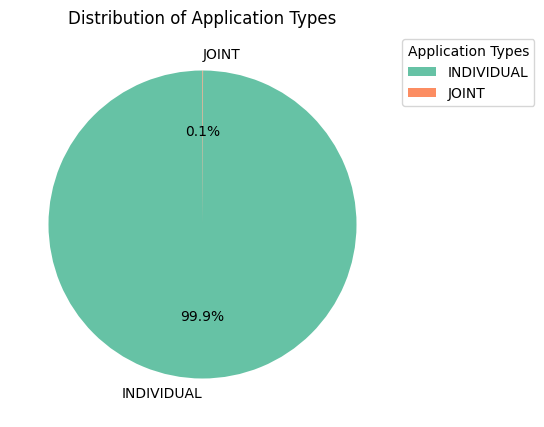

In [ ]:
# Get the value counts for 'application_type'
application_type_counts = df['application_type'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 5))

# Create the pie chart
plt.pie(application_type_counts.values, labels=application_type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2'))

# Add a legend
plt.legend(application_type_counts.index, title="Application Types", bbox_to_anchor=(1, 1), loc="best")

# Set title
plt.title('Distribution of Application Types')

# Display the plot
plt.show()

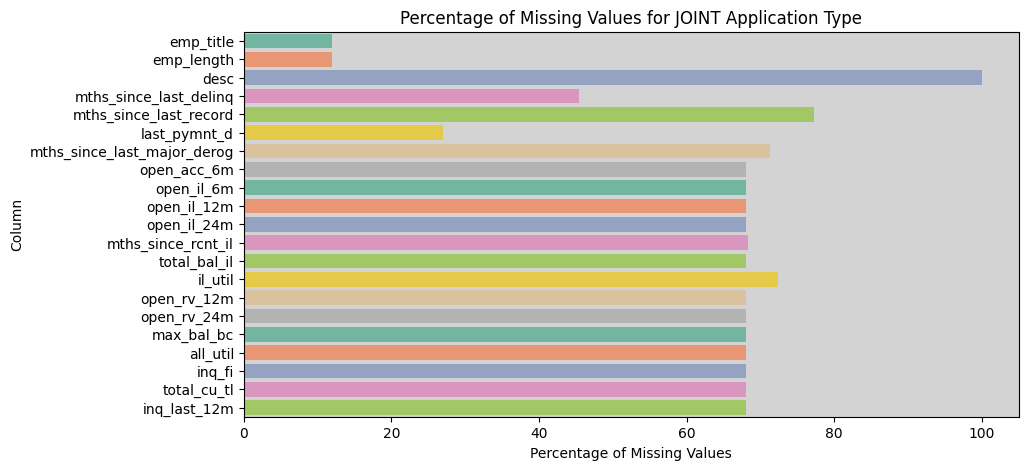

In [ ]:
# Get the percentage of missing values for the 'JOINT' application type
joint_na_percentages = df[df['application_type'] == 'JOINT'].isna().mean() * 100

# Filter columns with more than 5% missing values
joint_na_percentages = joint_na_percentages[joint_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 5))

# Create the bar plot using Seaborn
sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for JOINT Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

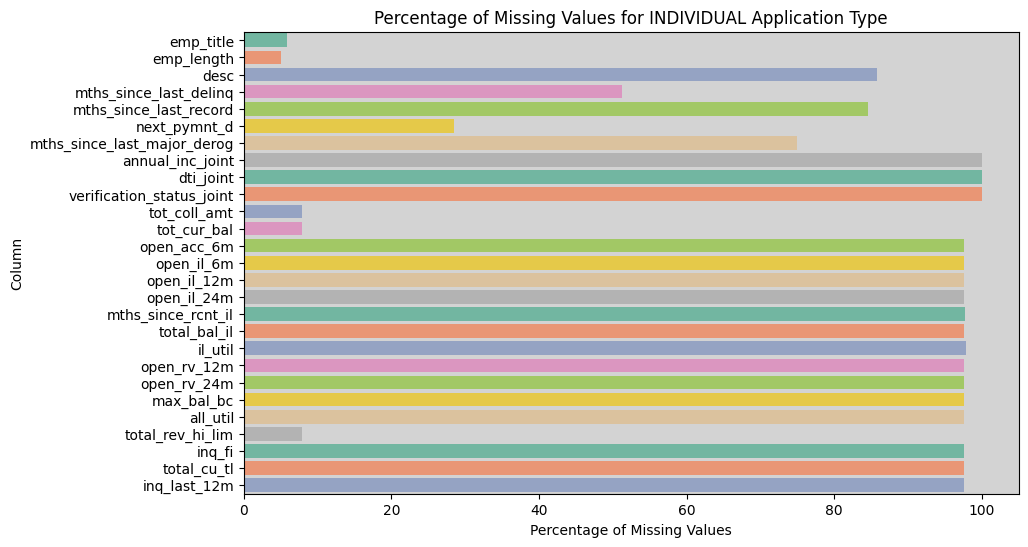

In [ ]:
# Get the percentage of missing values for the 'INDIVIDUAL' application type
individual_na_percentages = df[df['application_type'] == 'INDIVIDUAL'].isna().mean() * 100

# Filter columns with more than 5% missing values
individual_na_percentages = individual_na_percentages[individual_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for INDIVIDUAL Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [ ]:
df.shape

(887379, 74)

drop JOINT records to keep all values for INDIVIDUAL application_type

In [ ]:
df = df[df['application_type'] != 'JOINT']

In [ ]:
df.shape

(886868, 74)

In [ ]:
columns_to_drop = [i for i in df.columns if 'joint' in i]

columns_to_drop.append('application_type')

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

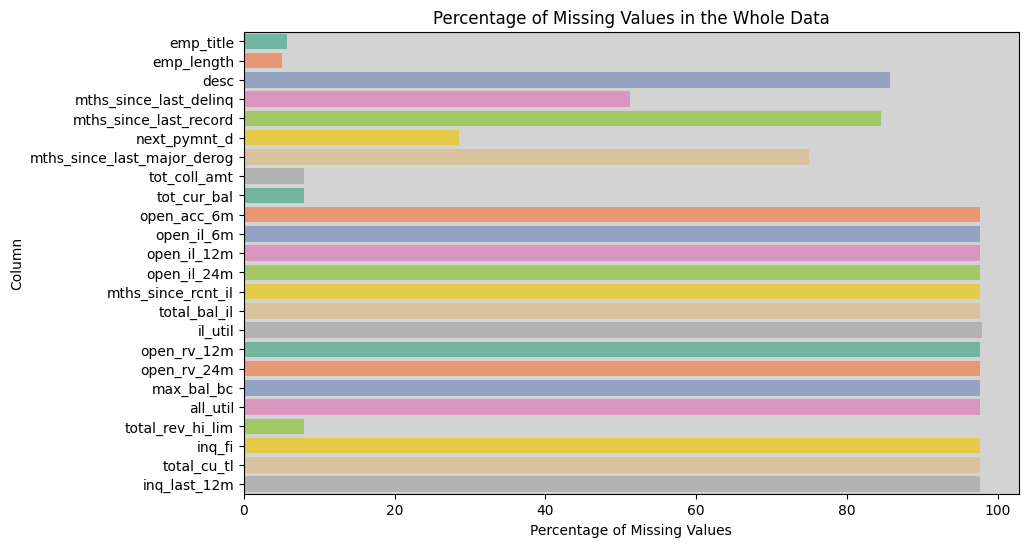

In [ ]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with more than 5% missing values
na_percentages = na_percentages[na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values in the Whole Data')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [ ]:
columns_to_drop = []

for i in df.columns:

  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
for i in df.columns:

  print({i: df[i].nunique()})

{'id': 886868}
{'member_id': 886868}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68701}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299159}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49345}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 886868}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4000}
{'delinq_2yrs': 29}
{'earliest_cr_line': 696}
{'inq_last_6mths': 28}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73738}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248246}
{'out_prncp_inv': 266137}
{'total_pymnt': 506637}
{'total_pymnt_inv': 506515}
{'total_rec_prncp': 260185}
{'total_rec_int': 324623}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232437}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 12}
{'

In [ ]:
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})

{'term': term
36 months    620886
60 months    265982
Name: count, dtype: int64}
{'grade': grade
B    254433
C    245717
A    148184
D    139419
E     70614
F     23022
G      5479
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'pymnt_plan': pymnt_plan
n    886858
y        10
Name: count, dtype: int64}
{'initial_list_status': initial_list_status
f    456703
w    430165
Name: count, dtype: int64}
{'policy_code': policy_code
1.0    886868
Name: count, dtype: int64}
{'acc_now_delinq': acc_now_delinq
0.0     882726
1.0       3865
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64}


In [ ]:
df.drop(columns=['pymnt_plan', 'policy_code', 'acc_now_delinq'], inplace=True)

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,NaN,NaN,NaN


In [ ]:
df[['grade', 'sub_grade']].head(5)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [ ]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
sub_grades = df['sub_grade'].unique()

sub_grades.sort()

sub_grades

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df.drop(columns=['id', 'member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d'], inplace=True)

In [ ]:
df.shape

(886868, 41)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,0.0,NaN,NaN,NaN


In [ ]:
df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)

In [ ]:
df.shape

(886868, 36)

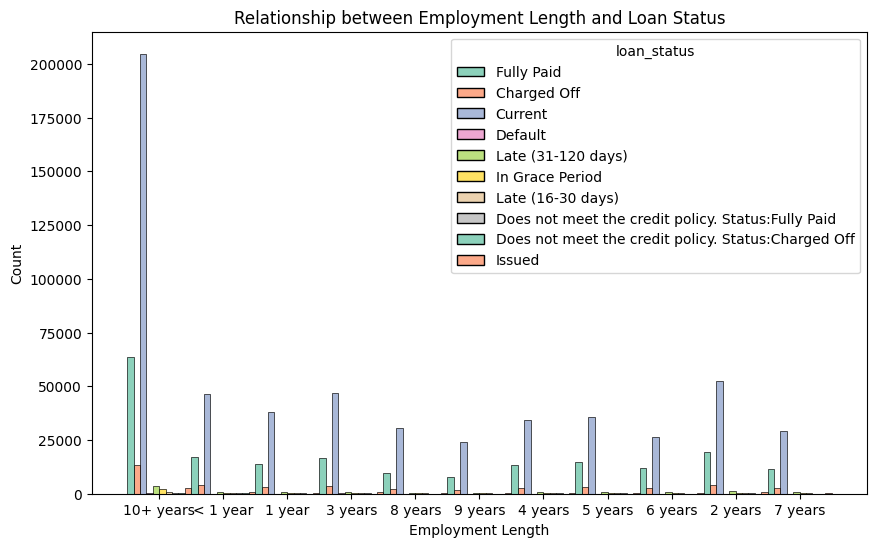

In [ ]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=df, x="emp_length", hue="loan_status", multiple="dodge", palette='Set2')

# Add title and axis labels
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
df.drop(columns=['emp_length'], inplace=True)

In [ ]:
importante_features = df.columns

In [ ]:
len(importante_features)

35

In [ ]:
terms = pd.read_excel('/kaggle/input/credit-risk-dataset/LCDataDictionary.xlsx')

In [ ]:
terms.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [ ]:
feature_description = terms[terms['LoanStatNew'].isin(importante_features)][['LoanStatNew', 'Description']]

In [ ]:
feature_description.reset_index(drop=True, inplace=True)

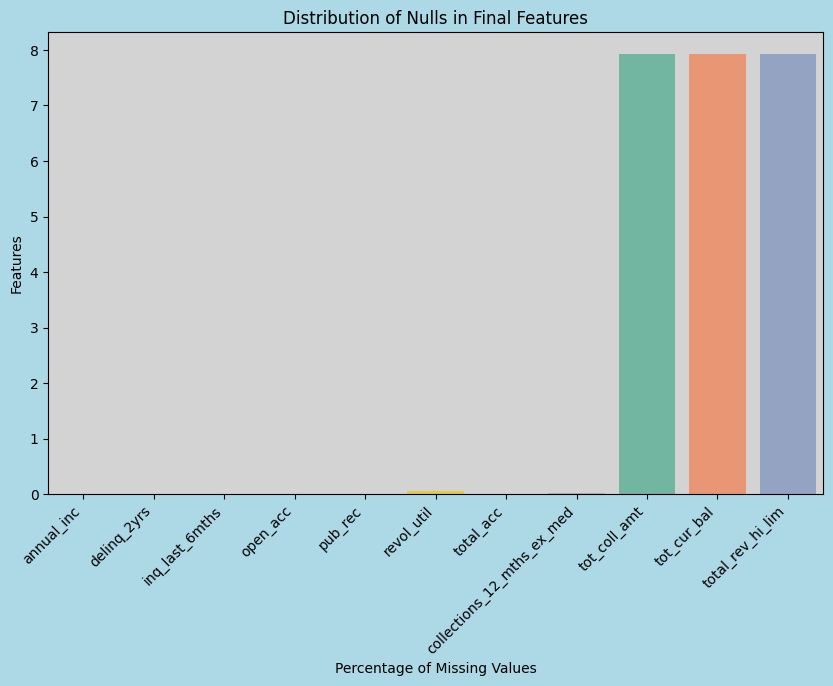

In [ ]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with any missing values
na_percentages = na_percentages[na_percentages > 0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Distribution of Nulls in Final Features')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Customize background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot
plt.gcf().set_facecolor('lightblue')  # Figure background color

# Display the plot
plt.show()

In [ ]:
df[na_percentages.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 886868 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  886864 non-null  float64
 1   delinq_2yrs                 886839 non-null  float64
 2   inq_last_6mths              886839 non-null  float64
 3   open_acc                    886839 non-null  float64
 4   pub_rec                     886839 non-null  float64
 5   revol_util                  886366 non-null  float64
 6   total_acc                   886839 non-null  float64
 7   collections_12_mths_ex_med  886723 non-null  float64
 8   tot_coll_amt                816592 non-null  float64
 9   tot_cur_bal                 816592 non-null  float64
 10  total_rev_hi_lim            816592 non-null  float64
dtypes: float64(11)
memory usage: 81.2 MB


In [ ]:
na_percentages

annual_inc                    0.000451
delinq_2yrs                   0.003270
inq_last_6mths                0.003270
open_acc                      0.003270
pub_rec                       0.003270
revol_util                    0.056604
total_acc                     0.003270
collections_12_mths_ex_med    0.016350
tot_coll_amt                  7.924065
tot_cur_bal                   7.924065
total_rev_hi_lim              7.924065
dtype: float64

In [ ]:
print(df.shape)

for i in na_percentages.index:

  if na_percentages[i] < 1:

    df.dropna(subset=[i], inplace=True)

print(df.shape)

(886868, 35)
(886253, 35)


## EDA and Visualizations

In [ ]:
importante_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

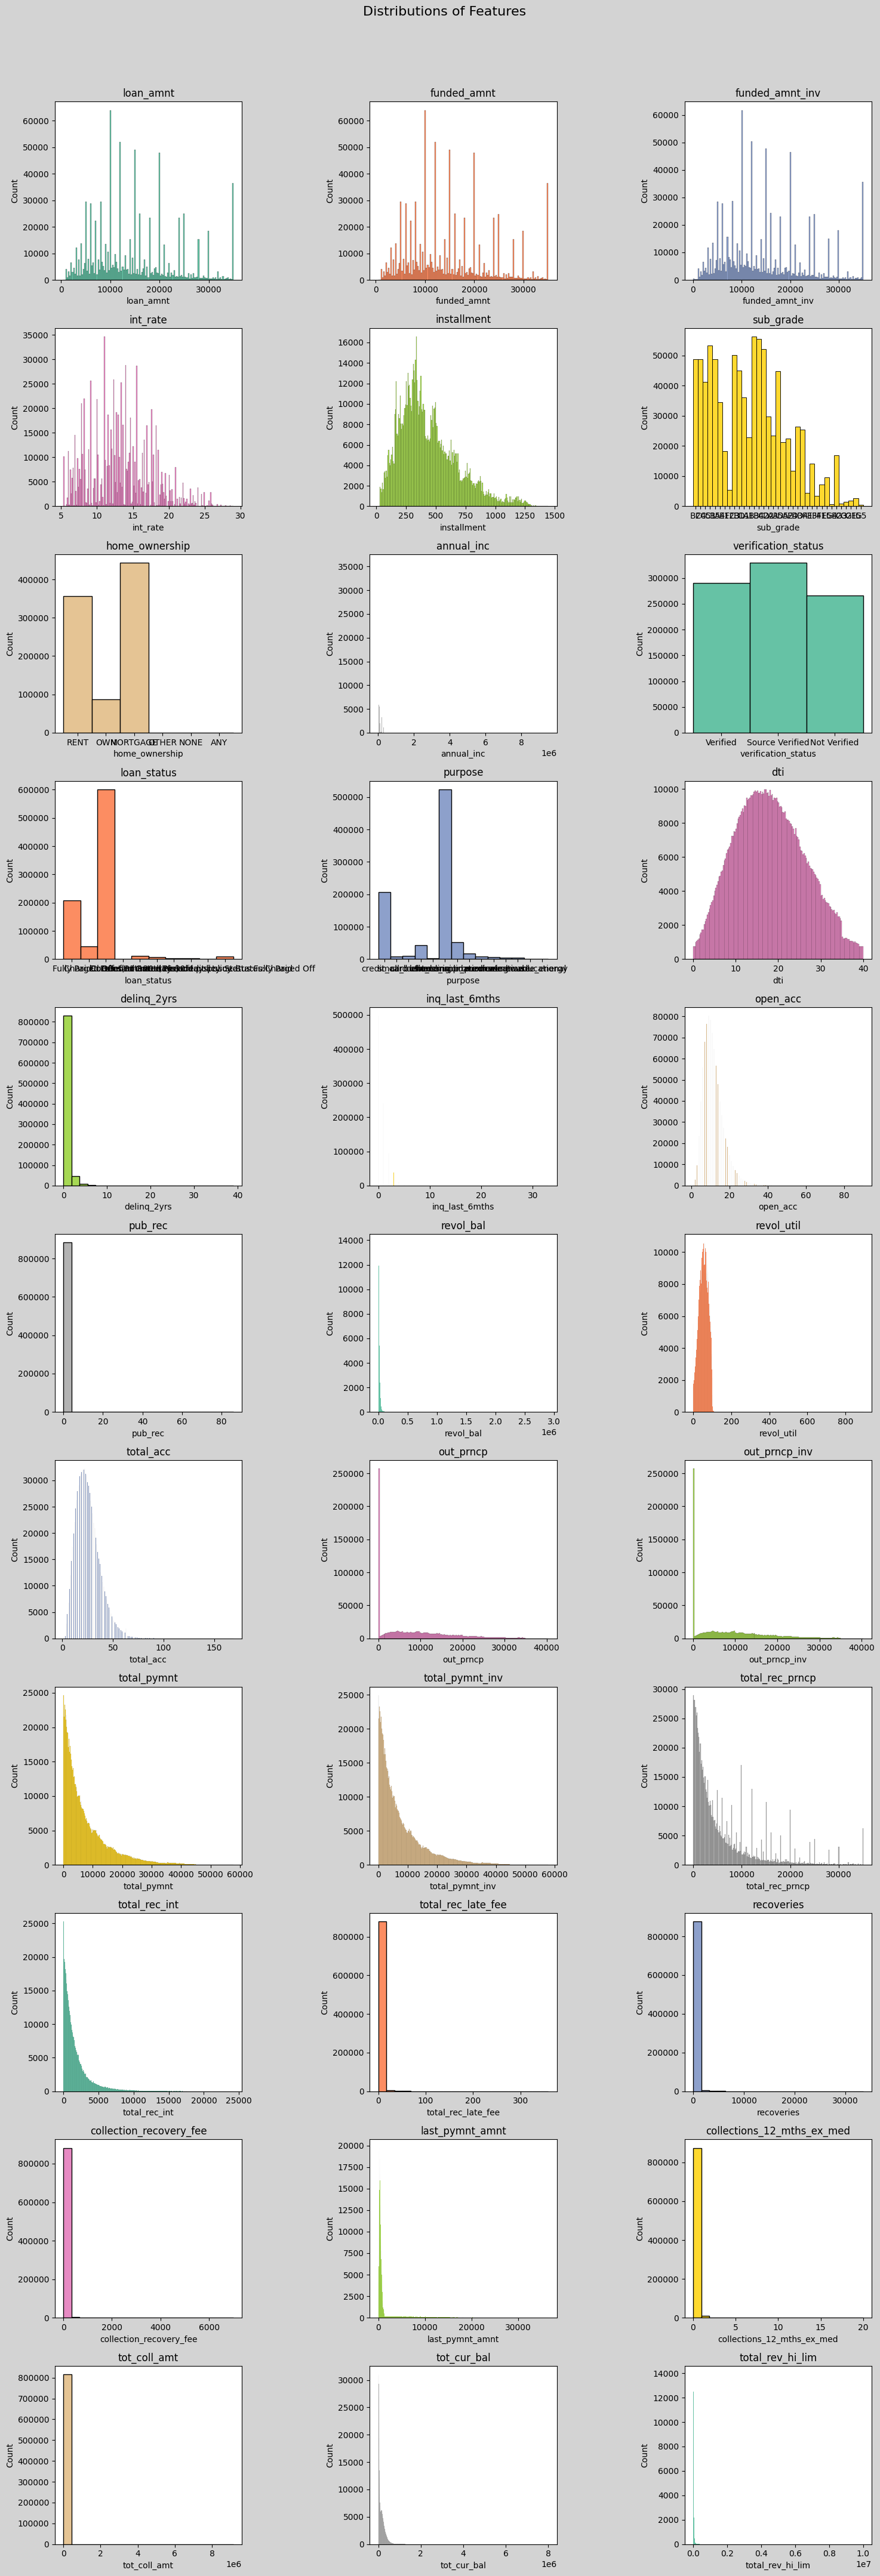

In [ ]:
features = [col for col in df.columns if df[col].nunique() > 2]



rows = (len(features) + 2) // 3

cols = 3



# Set up the figure and axis for subplots

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

axes = axes.flatten()  # Flatten in case of multiple rows



fig.patch.set_facecolor('lightgray')  # Set the background color of the entire figure



palette = sns.color_palette('Set2', len(features))



plotted_df = df.copy()

plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']

for i, col in enumerate(features):

    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1)  # Set alpha slightly transparent for better visualization

    axes[i].set_title(col)



# Remove any empty subplots (in case the number of features doesn't fill the grid)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])



fig.suptitle("Distributions of Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title



plt.show()

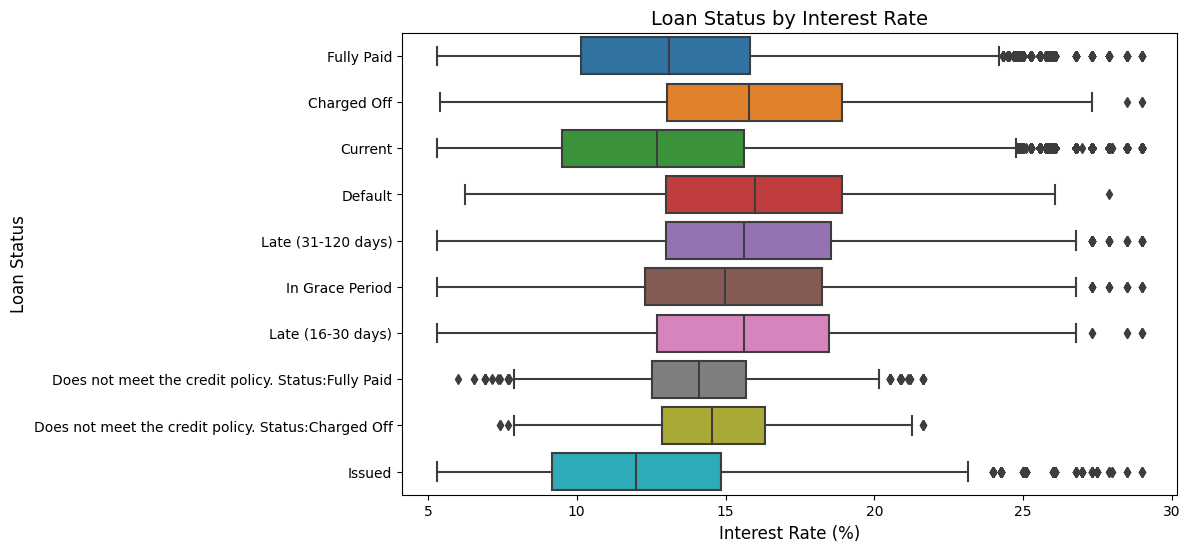

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='int_rate', y='loan_status', data=df)



plt.title('Loan Status by Interest Rate', fontsize=14)

plt.xlabel('Interest Rate (%)', fontsize=12)

plt.ylabel('Loan Status', fontsize=12)



plt.show()

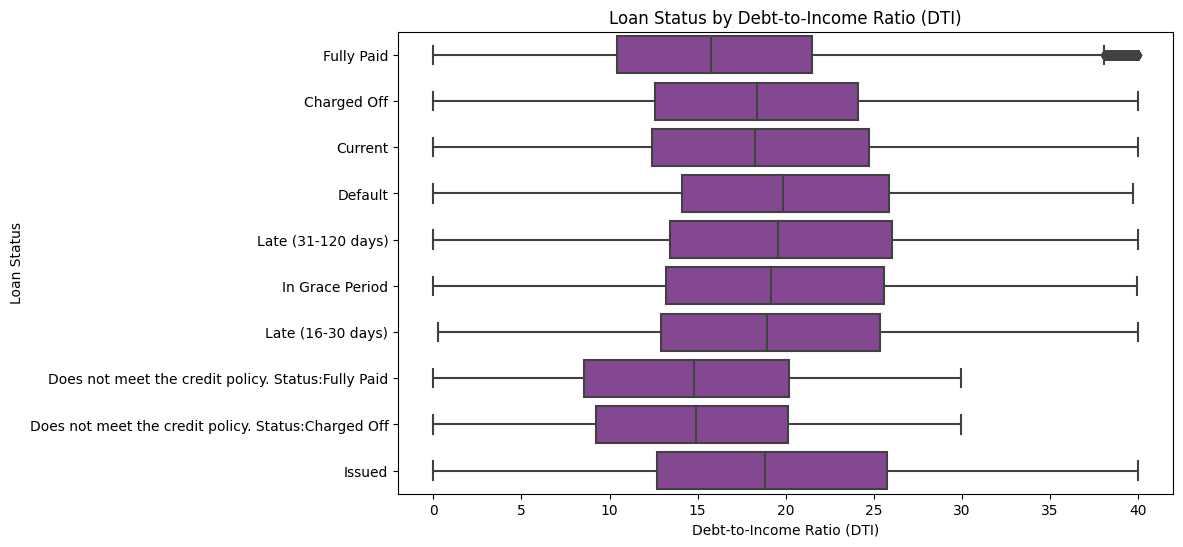

In [ ]:
plt.figure(figsize=(10, 6))



sns.boxplot(x='dti', y='loan_status', data=df, color='#8A3C9D')



plt.title('Loan Status by Debt-to-Income Ratio (DTI)')

plt.xlabel('Debt-to-Income Ratio (DTI)')

plt.ylabel('Loan Status')



plt.show()

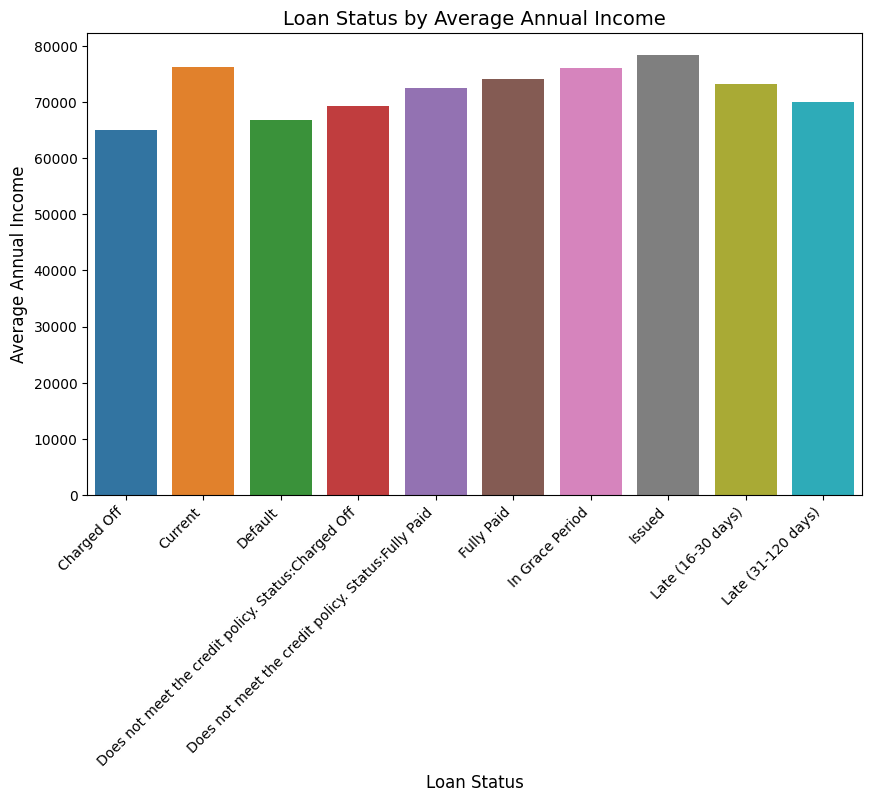

In [ ]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()



plt.figure(figsize=(10, 6))

sns.barplot(y='annual_inc',x='loan_status', data=avg_income)



plt.title('Loan Status by Average Annual Income', fontsize=14)

plt.xlabel('Loan Status', fontsize=12)

plt.ylabel('Average Annual Income', fontsize=12)

plt.xticks(rotation=45, ha='right')



plt.show()

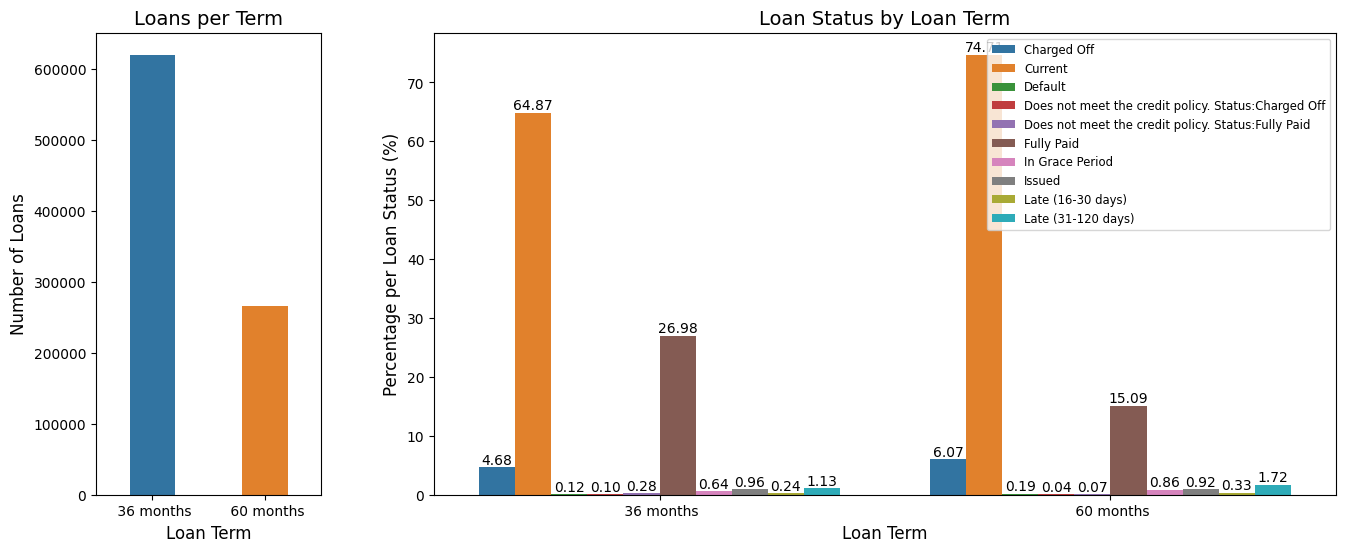

In [ ]:
loans_per_term = df['term'].value_counts().reset_index()



count_data = df.groupby(['term', 'loan_status']).size().reset_index(name='count')

count_data['percentage'] = count_data['count'] / count_data.groupby('term')['count'].transform('sum') * 100



fig = plt.figure(figsize=(16, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])



ax1 = plt.subplot(gs[0])

sns.barplot(x='term', y='count', data=loans_per_term, ax=ax1, width=0.4)

ax1.set_title('Loans per Term', fontsize=14)

ax1.set_xlabel('Loan Term', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)



ax2 = plt.subplot(gs[1])

sns.barplot(x='term', y='percentage', hue='loan_status', data=count_data, ax=ax2, width=0.8)

for p in ax2.patches:

    height = p.get_height()

    if height > 0:

        ax2.text(

            p.get_x() + p.get_width() / 2.,

            height,

            f'{height:.2f}',

            ha='center',

            va='bottom'

        )

ax2.set_title('Loan Status by Loan Term', fontsize=14)

ax2.set_xlabel('Loan Term', fontsize=12)

ax2.set_ylabel('Percentage per Loan Status (%)', fontsize=12)



ax2.legend( fontsize='small')



plt.show()

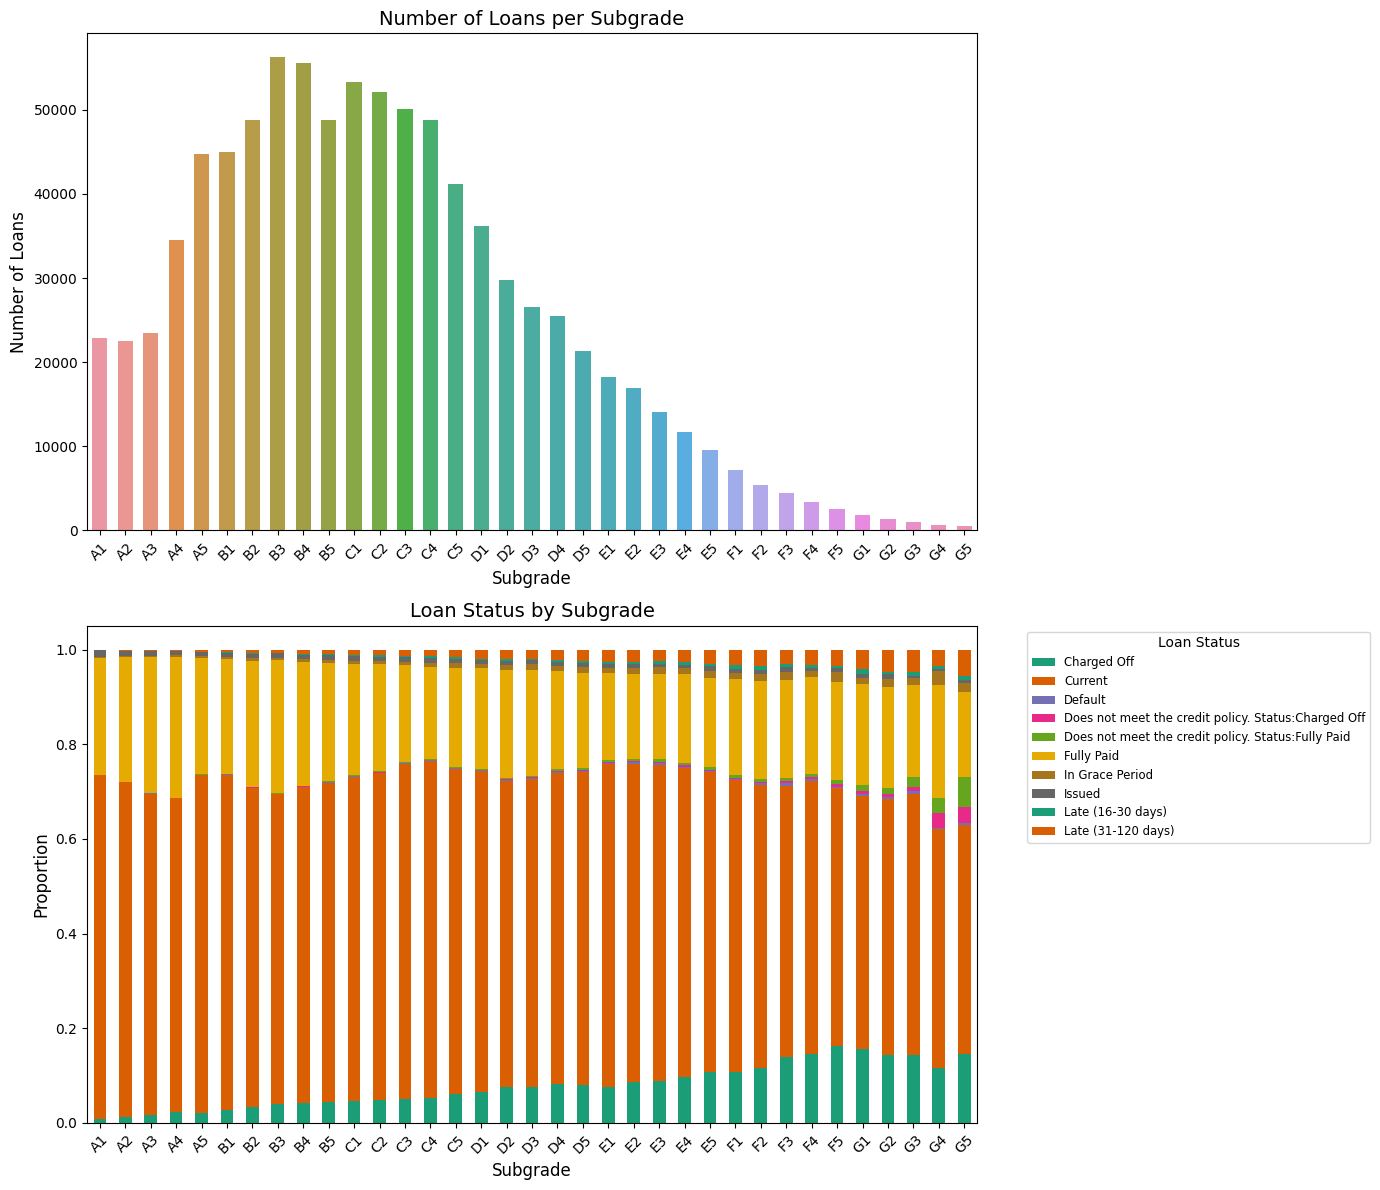

In [ ]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()



subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)



fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1, ax2 = axes[0], axes[1]



sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6)

ax1.set_title('Number of Loans per Subgrade', fontsize=14)

ax1.set_xlabel('Subgrade', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)

ax1.tick_params(axis='x', rotation=45)



subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))

ax2.set_title('Loan Status by Subgrade', fontsize=14)

ax2.set_xlabel('Subgrade', fontsize=12)

ax2.set_ylabel('Proportion', fontsize=12)

ax2.tick_params(axis='x', rotation=45)

ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')



plt.tight_layout()

plt.show()

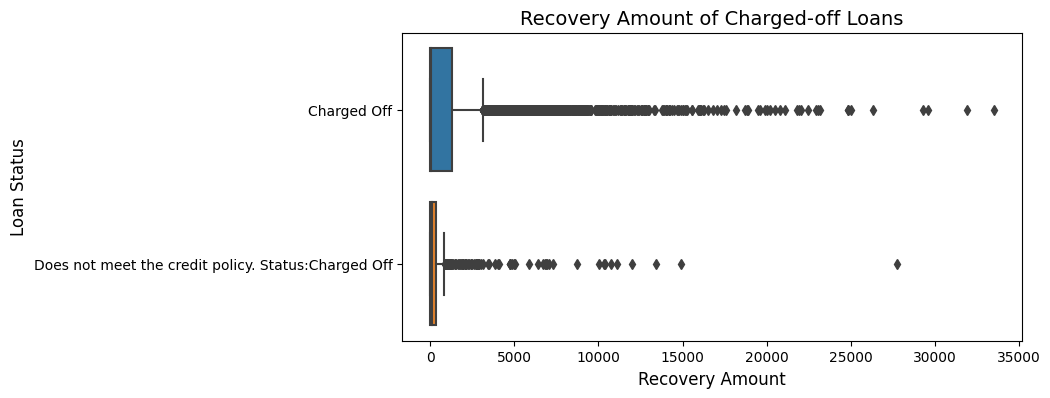

In [ ]:
charges_off_df = df[df['loan_status'].str.contains('Charged Off')]



plt.figure(figsize=(8, 4))

sns.boxplot(x='recoveries', y='loan_status', data=charges_off_df)



plt.title('Recovery Amount of Charged-off Loans', fontsize=14)

plt.ylabel('Loan Status', fontsize=12)

plt.xlabel('Recovery Amount', fontsize=12)



plt.show()

<Figure size 800x1000 with 0 Axes>

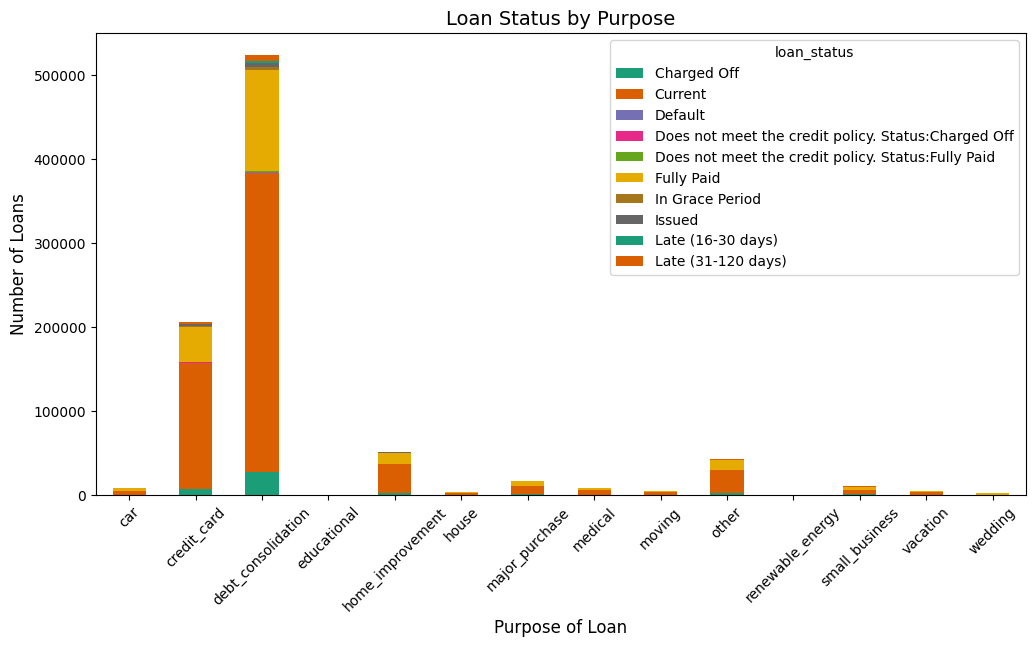

In [ ]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 10))

purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))



plt.title('Loan Status by Purpose', fontsize=14)

plt.xlabel('Purpose of Loan', fontsize=12)

plt.ylabel('Number of Loans', fontsize=12)

plt.xticks(rotation=45)



plt.show()


## Encoding

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.head()

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status
0,36 months,B2,RENT,Verified,credit_card,f
1,60 months,C4,RENT,Source Verified,car,f
2,36 months,C5,RENT,Not Verified,small_business,f
3,36 months,C1,RENT,Source Verified,other,f
4,60 months,B5,RENT,Source Verified,other,f


In [ ]:
for i in categorical_features.columns:

  print({i: categorical_features[i].value_counts()})

{'term': term
36 months    620387
60 months    265866
Name: count, dtype: int64}
{'sub_grade': sub_grade
B3    56283
B4    55568
C1    53329
C2    52179
C3    50097
C4    48785
B5    48774
B2    48748
B1    44951
A5    44791
C5    41168
D1    36164
A4    34511
D2    29754
D3    26507
D4    25506
A3    23444
A1    22907
A2    22467
D5    21345
E1    18234
E2    16960
E3    14105
E4    11687
E5     9542
F1     7203
F2     5374
F3     4422
F4     3399
F5     2589
G1     1864
G2     1388
G3      978
G4      659
G5      571
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    442916
RENT        355748
OWN          87362
OTHER          180
NONE            44
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329259
Verified           290635
Not Verified       266359
Name: count, dtype: int64}
{'purpose': purpose
debt_consolidation    523642
credit_card           205989
home_improvement       51724
other            

In [ ]:
def sub_grades_encoding(x):

  val = 0

  if 'A' in x:

    val = 7

  elif 'B' in x:

    val = 6

  elif 'C' in x:

    val = 5

  elif 'D' in x:

    val = 4

  elif 'E' in x:

    val = 3

  elif 'F' in x:

    val = 2

  elif 'G' in x:

    val = 1



  if '1' in x:

    val += 0.8

  elif '2' in x:

    val += 0.6

  elif '3' in x:

    val += 0.4

  elif '4' in x:

    val += 0.2

  elif '5' in x:

    val += 0.0



  return val



def verification_status(x):

  if x == 'Not Verified':

    return 0

  return 1

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)

In [ ]:
df['sub_grade'].unique()

array([6.6, 5.2, 5. , 5.8, 6. , 7.2, 3.8, 2.6, 5.4, 6.8, 4.8, 7.8, 6.4,
       6.2, 5.6, 4.6, 7.4, 7. , 4. , 7.6, 3.2, 4.4, 4.2, 2.4, 3.4, 2.2,
       2.8, 3. , 1.2, 3.6, 1.4, 1.6, 1.8, 2. , 1. ])

In [ ]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()



df['term'] = label_encoder.fit_transform(df['term'])

df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [ ]:
df['verification_status'] = df['verification_status'].apply(verification_status)

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.isna().sum()

home_ownership    0
purpose           0
dtype: int64

In [ ]:
encoded_features = pd.get_dummies(categorical_features, dtype=int)

encoded_features.head(3)

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.drop(columns=categorical_features.columns, inplace=True)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,0,10.65,162.87,6.6,24000.0,1,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,5.2,30000.0,1,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,NaN,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,5.0,12252.0,0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

## Handling Missing Values

In [ ]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
annual_inc                        0
verification_status               0
loan_status                       0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [ ]:
# # Importing necessary libraries

# from sklearn.experimental import enable_iterative_imputer  # To enable IterativeImputer

# from sklearn.impute import IterativeImputer



# # Initialize the IterativeImputer with optimized settings

# imputer = IterativeImputer(max_iter=5, random_state=0)



# # Fit and transform the data

# imputed_data = imputer.fit_transform(df)



# # Convert back to a DataFrame if needed

# imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

'the IterativeImputer_credit.csv holds the imputed data'

In [ ]:
imputed_df = pd.read_csv('/kaggle/input/credit-risk-handled-data/IterativeImputer_credit.csv')

In [ ]:
imputed_df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
annual_inc                    0
verification_status           0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
tot_coll_amt                  0
tot_cur_

In [ ]:
imputed_df.shape

(886253, 53)

In [ ]:
imputed_df['inq_last_6mths'].value_counts()

inq_last_6mths
0.0     497247
1.0     241225
2.0      94020
3.0      37365
4.0      10737
5.0       3982
6.0       1227
7.0        194
8.0        121
9.0         47
10.0        23
11.0        15
12.0        14
15.0         8
14.0         5
13.0         4
18.0         3
16.0         3
17.0         2
24.0         2
19.0         2
33.0         1
32.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: count, dtype: int64

# Split Data & Scaling

In [ ]:
from sklearn.model_selection import train_test_split



x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [ ]:
x_rest, X, y_rest, Y = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y, shuffle=True)

In [ ]:
X.shape, Y.shape

((88626, 52), (88626,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

# Feature Reduction

In [ ]:
from sklearn.decomposition import PCA



pca = PCA(n_components=len(x_train.columns))



pca.fit(x_train)

PCA(n_components=52)

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

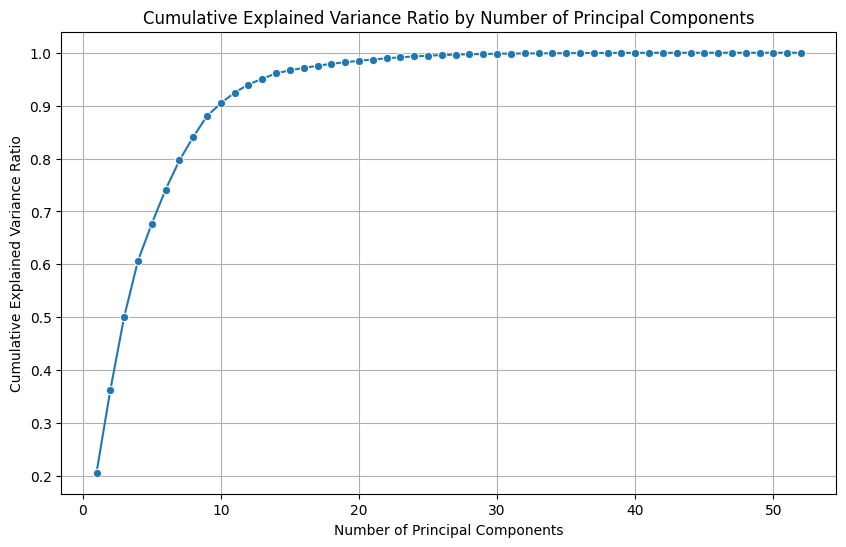

In [ ]:
# Create a DataFrame for cumulative explained variance ratio
cvr = pd.DataFrame({
    'Number of Principal Components': range(1, len(cumulative_variance_ratio) + 1),
    'Cumulative Explained Variance Ratio': cumulative_variance_ratio
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the line plot using Seaborn
sns.lineplot(data=cvr,
             x='Number of Principal Components',
             y='Cumulative Explained Variance Ratio',
             marker='o')  # Adding markers for clarity

# Add title and labels
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Add grid lines for better readability
plt.grid(True)

# Show the figure
plt.show()

In [ ]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

# Modeling

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



rf_classifier = RandomForestClassifier(n_estimators=500,  max_depth=7, random_state=42)

rf_classifier.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [ ]:
y_pred_train = rf_classifier.predict(x_train_pca)

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

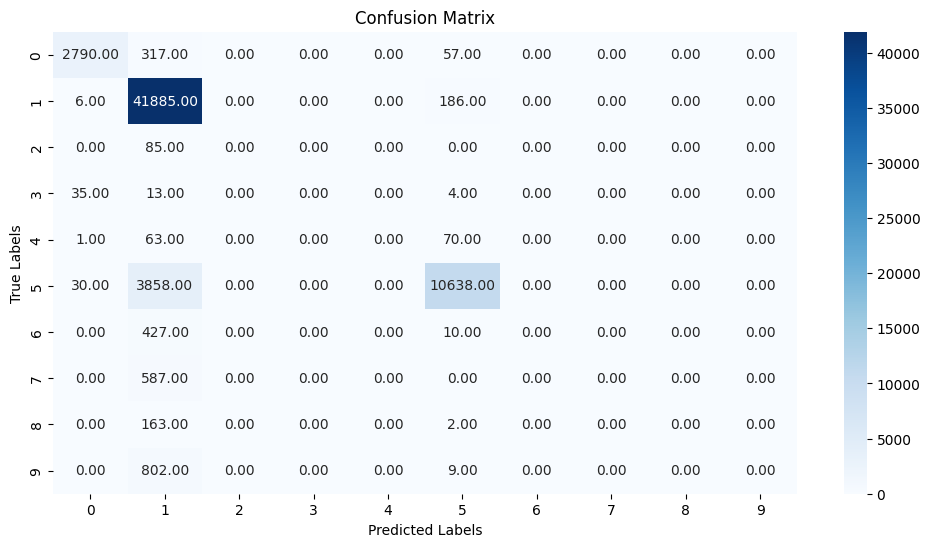

In [ ]:
# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93      3164
         1.0       0.87      1.00      0.93     42077
         2.0       0.00      0.00      0.00        85
         3.0       0.00      0.00      0.00        52
         4.0       0.00      0.00      0.00       134
         5.0       0.97      0.73      0.83     14526
         6.0       0.00      0.00      0.00       437
         7.0       0.00      0.00      0.00       587
         8.0       0.00      0.00      0.00       165
         9.0       0.00      0.00      0.00       811

    accuracy                           0.89     62038
   macro avg       0.28      0.26      0.27     62038
weighted avg       0.87      0.89      0.87     62038



In [ ]:
f1_score(y_train, y_pred_train, average='weighted')

0.8719309408007956

In [ ]:
y_pred_test = rf_classifier.predict(x_test_pca)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

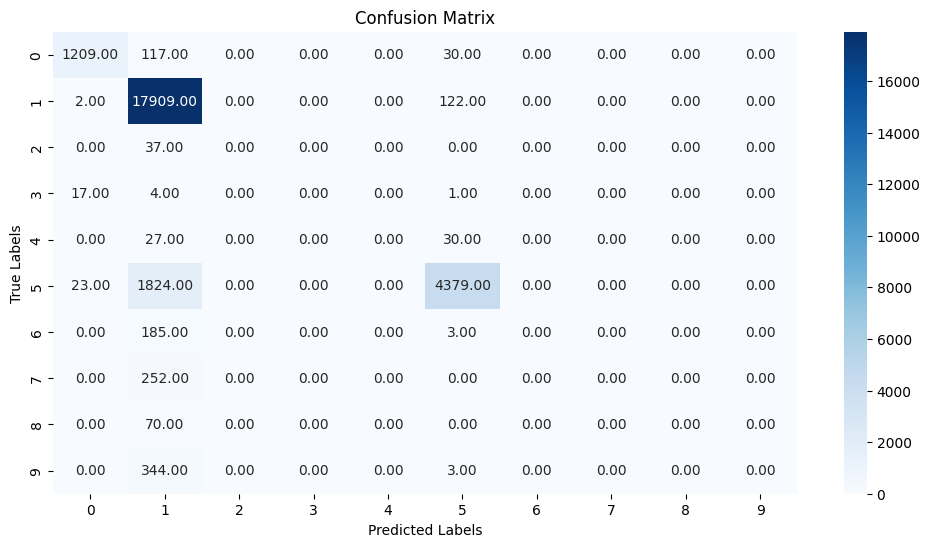

In [ ]:
# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1356
         1.0       0.86      0.99      0.92     18033
         2.0       0.00      0.00      0.00        37
         3.0       0.00      0.00      0.00        22
         4.0       0.00      0.00      0.00        57
         5.0       0.96      0.70      0.81      6226
         6.0       0.00      0.00      0.00       188
         7.0       0.00      0.00      0.00       252
         8.0       0.00      0.00      0.00        70
         9.0       0.00      0.00      0.00       347

    accuracy                           0.88     26588
   macro avg       0.28      0.26      0.27     26588
weighted avg       0.86      0.88      0.86     26588



In [ ]:
f1_score(y_test, y_pred_test, average='weighted')

0.8633792999461135

## XGBoost

In [ ]:
from xgboost import XGBClassifier



model = XGBClassifier(

    n_estimators=500,        # Number of boosting rounds

    learning_rate=0.1,       # Step size shrinkage to prevent overfitting

    max_depth=3,             # Maximum depth of a tree

    subsample=0.8,           # Subsample ratio of the training data

    colsample_bytree=0.8,    # Subsample ratio of features for each tree

    gamma=0,                 # Minimum loss reduction required to make a further partition

    reg_lambda=1,            # L2 regularization term

    objective='multi:softmax' # For multiclass classification (use 'binary:logistic' for binary)

)

In [ ]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

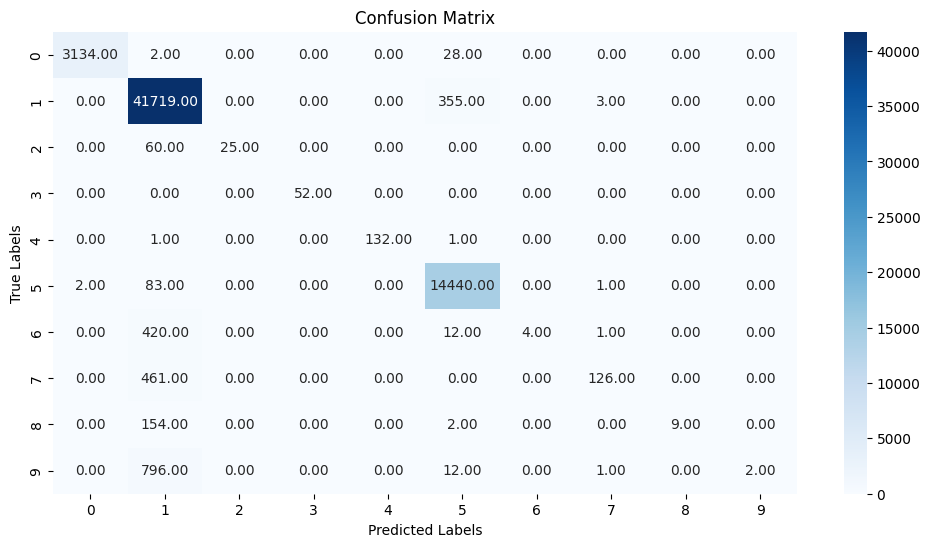

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3164
         1.0       0.95      0.99      0.97     42077
         2.0       1.00      0.29      0.45        85
         3.0       1.00      1.00      1.00        52
         4.0       1.00      0.99      0.99       134
         5.0       0.97      0.99      0.98     14526
         6.0       1.00      0.01      0.02       437
         7.0       0.95      0.21      0.35       587
         8.0       1.00      0.05      0.10       165
         9.0       1.00      0.00      0.00       811

    accuracy                           0.96     62038
   macro avg       0.99      0.55      0.59     62038
weighted avg       0.96      0.96      0.95     62038



0.948105231773977

In [ ]:
y_pred_train_xgb = model.predict(x_train_pca)

cm = confusion_matrix(y_train, y_pred_train_xgb)

# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_train, y_pred_train_xgb))

f1_score(y_train, y_pred_train_xgb, average='weighted')

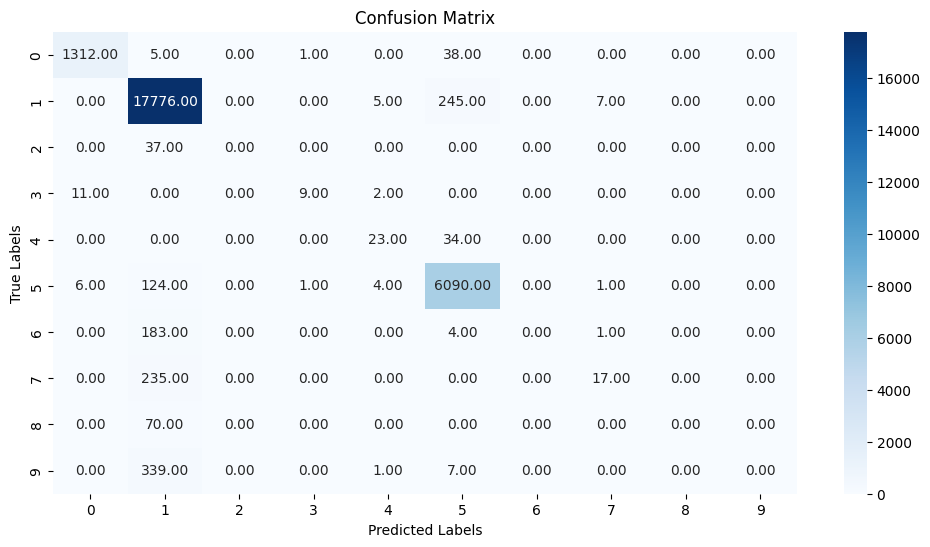

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1356
         1.0       0.95      0.99      0.97     18033
         2.0       0.00      0.00      0.00        37
         3.0       0.82      0.41      0.55        22
         4.0       0.66      0.40      0.50        57
         5.0       0.95      0.98      0.96      6226
         6.0       0.00      0.00      0.00       188
         7.0       0.65      0.07      0.12       252
         8.0       0.00      0.00      0.00        70
         9.0       0.00      0.00      0.00       347

    accuracy                           0.95     26588
   macro avg       0.50      0.38      0.41     26588
weighted avg       0.92      0.95      0.93     26588



0.9332983186566568

In [ ]:
y_pred_test_xgb = model.predict(x_test_pca)

cm = confusion_matrix(y_test, y_pred_test_xgb)

# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_test, y_pred_test_xgb))

f1_score(y_test, y_pred_test_xgb, average='weighted')

In [ ]:
label_encoder.classes_

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

## XGBoost on all data

In [ ]:
x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [ ]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

In [ ]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

In [ ]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

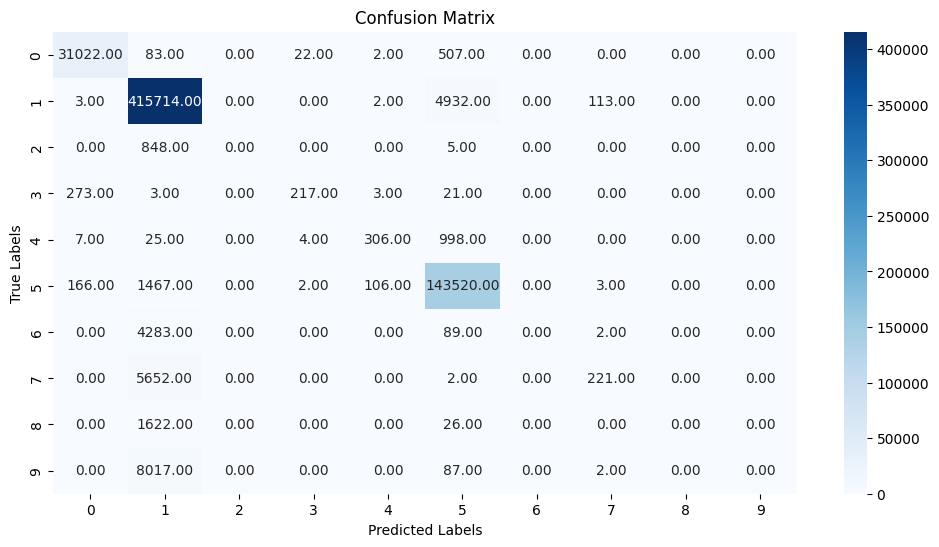

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     31636
         1.0       0.95      0.99      0.97    420764
         2.0       0.00      0.00      0.00       853
         3.0       0.89      0.42      0.57       517
         4.0       0.73      0.23      0.35      1340
         5.0       0.96      0.99      0.97    145264
         6.0       0.00      0.00      0.00      4374
         7.0       0.65      0.04      0.07      5875
         8.0       0.00      0.00      0.00      1648
         9.0       0.00      0.00      0.00      8106

    accuracy                           0.95    620377
   macro avg       0.52      0.36      0.39    620377
weighted avg       0.93      0.95      0.94    620377

Accuracy Train: 0.9526465358967209
F1 Score Trian: 0.9363921573624311


In [ ]:
y_pred_train_xgb = model.predict(x_train_pca)
cm = confusion_matrix(y_train, y_pred_train_xgb)
# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_train, y_pred_train_xgb))

Accuracy_Train = accuracy_score(y_train, y_pred_train_xgb)
F1_Score_Train = f1_score(y_train, y_pred_train_xgb, average='weighted')

print(f"Accuracy Train: {Accuracy_Train}")
print(f"F1 Score Trian: {F1_Score_Train}")

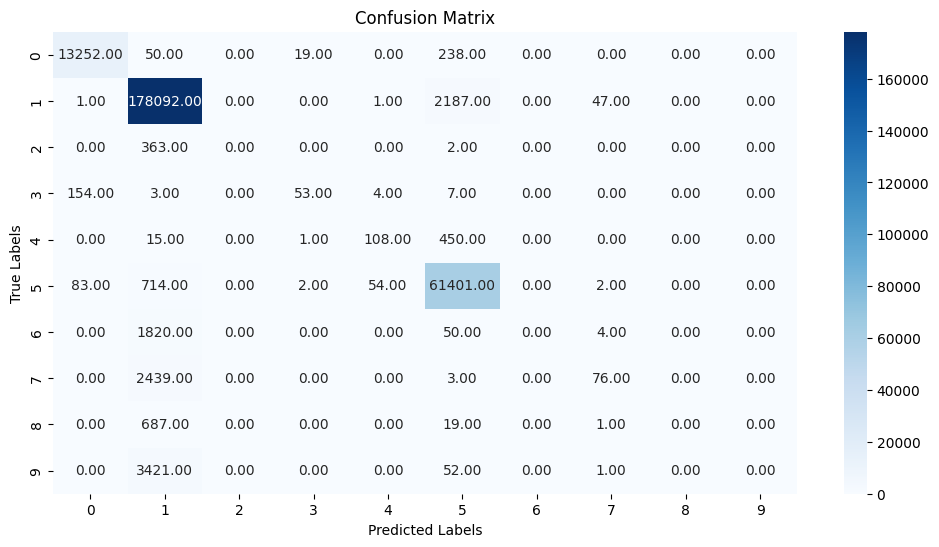

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     13559
         1.0       0.95      0.99      0.97    180328
         2.0       0.00      0.00      0.00       365
         3.0       0.71      0.24      0.36       221
         4.0       0.65      0.19      0.29       574
         5.0       0.95      0.99      0.97     62256
         6.0       0.00      0.00      0.00      1874
         7.0       0.58      0.03      0.06      2518
         8.0       0.00      0.00      0.00       707
         9.0       0.00      0.00      0.00      3474

    accuracy                           0.95    265876
   macro avg       0.48      0.34      0.36    265876
weighted avg       0.92      0.95      0.94    265876

Accuracy Test: 0.9515037084956898
F1 Score Test: 0.9350382934638976


In [ ]:
y_pred_test_xgb = model.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred_test_xgb)
# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test, y_pred_test_xgb))

Accuracy_Test = accuracy_score(y_test, y_pred_test_xgb)
F1_Score_Test = f1_score(y_test, y_pred_test_xgb, average='weighted')

print(f"Accuracy Test: {Accuracy_Test}")
print(f"F1 Score Test: {F1_Score_Test}")

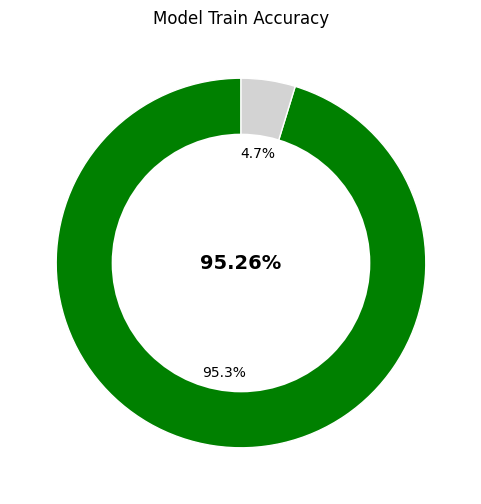

In [ ]:
# Create a pie chart with a single slice representing the accuracy
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(Accuracy_Train*100, 2), 100 - round(Accuracy_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(Accuracy_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Train Accuracy')

# Show the plot
plt.show()

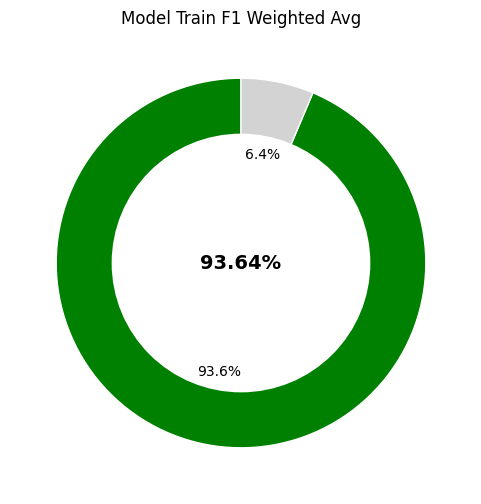

In [ ]:
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(F1_Score_Train*100, 2), 100 - round(F1_Score_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(F1_Score_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Train F1 Weighted Avg')

# Show the plot
plt.show()

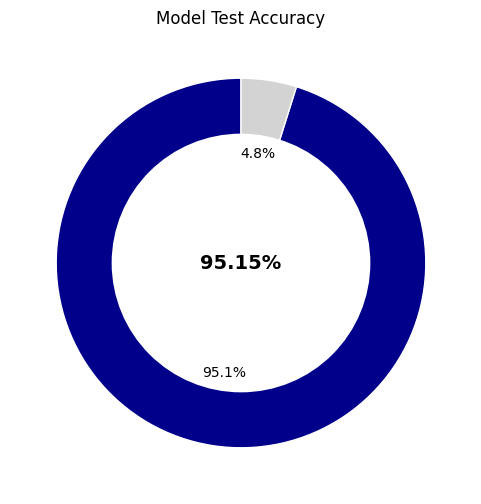

In [ ]:
# Create a pie chart with a single slice representing the accuracy
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(Accuracy_Test*100, 2), 100 - round(Accuracy_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(Accuracy_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Test Accuracy')

# Show the plot
plt.show()

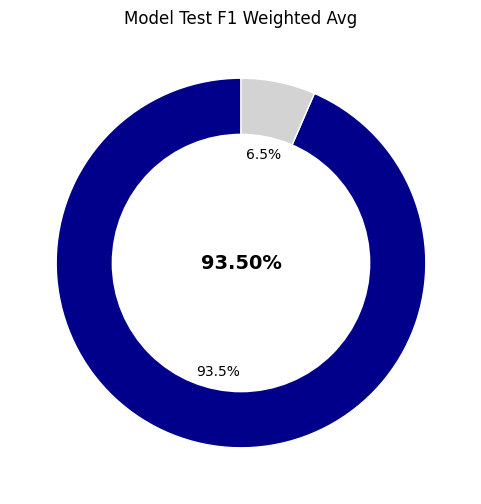

In [ ]:
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(F1_Score_Test*100, 2), 100 - round(F1_Score_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(F1_Score_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Test F1 Weighted Avg')

# Show the plot
plt.show()